In [1]:
from bs4 import BeautifulSoup as bs
import time
import requests
import json
import pandas as pd
import json
import urllib
import platform
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt

In [6]:
def booking(pages,places,checkin,checkout):
    base_url='https://www.booking.com/searchresults.ko.html'
    total=[]
    for i in range(pages):
        params={
            'top_ufis':1,
            'rows':25,
            'group_adults':1,
            'group_children':0,
            'label_click':'undef',
            'checkin_month':checkin.split("-")[1],
            'checkin_monthday':checkin.split("-")[2],
            'checkin_year':checkin.split("-")[0],
            'checkout_month':checkout.split("-")[1],
            'checkout_monthday':checkout.split("-")[2],
            'checkout_year':checkout.split("-")[0],
            'no_rooms':1,
            #'raw_dest_type':'region',
            'offset':25*i,   
            'sb_price_type': 'total',
            'ss': places,
            #'src_elem': 'sb', 
            #'ss_all':0,
            #'ssb': 'empty',
            #'dest_type': 'region',
            #'search_pageview_id': 'b78a37b8196a0080'
            'search_selected':1
        }
        headers = {
            'Referer': 'https://www.booking.com/searchresults.ko.html',
            'Cookie': 'cors_js=1; _gcl_au=1.1.1758010469.1596413772; bs=%7B%22sr_country_or_region_page%22%3A%22region%22%7D; _ga=GA1.2.882061434.1596413773; _gid=GA1.2.1846610763.1596413773; BJS=-; zz_cook_tms_seg1=1; zz_cook_tms_ep=1; zz_cook_tms_seg3=7; _scid=dff99b5d-2e14-4af2-9550-58237e3d9d4c; _pxvid=8ac1c871-d51e-11ea-b163-0242ac120009; _sctr=1|1596380400000; _pin_unauth=dWlkPU9UazVabVF4T1RRdE56bGhPQzAwTUdabUxXSm1ORFF0WldRMVptVmpNemRrWXpVdw; has_preloaded=1; zz_cook_tms_hlist=3317637; g_state={"i_p":1596531334237,"i_l":2}; utag_main=v_id:0173b1ad0651001df4a85a0a77f203073044706b00bd0$_sn:1$_ss:0$_st:1596448493168$4split:2$4split2:1$ses_id:1596413773394%3Bexp-session$_pn:16%3Bexp-session; _uetsid=f2d8e4c9c62246a0bed0af7e885f8c9f; _uetvid=269cfd473b2529680b9b538f1b46fbc1; bkng=11UmFuZG9tSVYkc2RlIyh9Yaa29%2F3xUOLbXpFeYC4TUhBdXo35xAS%2BPyXteEmAF00C7ntv3OHZGFN5Omw3tnwU%2F3rlk1nbz%2BONusrZE%2BcQgZLBk0JeBSBtWgSf%2BJ%2BC2ShbUfWTKv6cwfj%2FUbmattwzhSpTIYyiyIWa7e5d6rxwuVVQqabr7YAgMkH%2F%2Fu6fNsyuyQoTASDGyEw%3D; _px3=534b016a13eceb8dfd91bad5c3807ed4049eeef67f96ffa26e4b9b0710069380:RhcCPVe8GBdA9jMG9PvURiL0ylPlLetN980mHJcuwmC2w9omcccJP2dnTAIXjLyb5eVJcGGTsFBxUVGdCNCg6g==:1000:sGlUhQDbcD++cAinRcf8FQIrgXsopgDXZYkK7uRiQhuAUhE1XXniOrLt6s/Gb1GMVWTdokUn2mREYh+JnCAJ6PpWZsrVHgWYSaF8wEucBT9rs5PjjXKHUrT7Y6DZV/P832v9mal2qz9asNi/uf7Gt9o/kTvyVoqN90YhP8ivD2M=; _pxde=8e07b07f8b1c1d5d950a0e87a21708a96b04456fe969788c88d7c52548705a1e:eyJ0aW1lc3RhbXAiOjE1OTY0NDY3NjkxMjMsImZfa2IiOjAsImlwY19pZCI6W119; lastSeen=0',
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'    }
        resp=requests.get(base_url,params=params, headers=headers)
        soup=BeautifulSoup(resp.text)

    #     hotellist_inner=soup.find('div',id='hotellist_inner')
    #     hotels=hotellist_inner.find_all('div', class_='sr_item')
        hotels = soup.find_all('div', class_='sr_item')

        hotel_list=[]
        for hotel in hotels:        
            names=hotel.find('span',class_='sr-hotel__name')
            name=names.text#호텔이름
            reviews=hotel.find('div',class_='bui-review-score__badge')
            if reviews:
                review=reviews.text
            else:
                review= None
            prices=hotel.find('div',class_='bui-price-display__value')
            price=prices.text

            counts=hotel.find('div',class_='bui-review-score__text')
            if counts:
                count = counts.text
            else:
                count = 0
            hotel_list.append({
                'name':name,
                'reviews':review,
                'count':count,
                'price':price
            })
        total.extend(hotel_list)
     #데이터 잔처리,중복제거   
    for i in total:
        i['name']=i['name'].replace("\n","").strip()
        if i['reviews']!=None:
            i['reviews']=i['reviews'].strip()
            i['reviews']=float(i['reviews'])
        i['price']=i['price'].replace("\n","").strip()
        i['price']=i['price'].replace("₩","").strip()
        if i['count']!=0:
            i['count']=i['count'].strip()
            a=i['count'].index('개')
            count_str = i['count'][0:a]
            count_str = count_str.replace(',', '')
            i['count']=float(count_str)
        i['price']=i['price'].replace(',','')
        i['price']=float(i['price'])
        #print(i)
    result_list=list({s['name']:s for s in total}.values()) 
    return result_list

In [18]:
result=booking(1,'부산','2020-08-16','2020-08-17')

In [19]:
result

[{'name': '더 비에스 호텔 부산역', 'reviews': 8.3, 'count': 686.0, 'price': 51000.0},
 {'name': '펠릭스 바이 STX 호텔 & 스위트',
  'reviews': 8.6,
  'count': 1650.0,
  'price': 166000.0},
 {'name': '파크하얏트 부산', 'reviews': 8.8, 'count': 791.0, 'price': 715000.0},
 {'name': '신라스테이 해운대', 'reviews': 8.1, 'count': 1440.0, 'price': 506000.0},
 {'name': '베스트웨스턴 해운대 호텔', 'reviews': 8.1, 'count': 1966.0, 'price': 180000.0},
 {'name': '센텀 프리미어 호텔', 'reviews': 8.2, 'count': 1315.0, 'price': 77000.0},
 {'name': '해운대 센텀 호텔', 'reviews': 8.2, 'count': 1484.0, 'price': 143000.0},
 {'name': '토요코인 부산 해운대 2', 'reviews': 8.4, 'count': 1410.0, 'price': 41000.0},
 {'name': '부산 웨스틴조선호텔', 'reviews': 8.5, 'count': 455.0, 'price': 451000.0},
 {'name': '해운대 마리안느 호텔', 'reviews': 7.6, 'count': 991.0, 'price': 137500.0},
 {'name': '라발스호텔', 'reviews': 8.3, 'count': 584.0, 'price': 203000.0},
 {'name': '농심 호텔', 'reviews': 8.4, 'count': 544.0, 'price': 108000.0},
 {'name': '호텔 더 마크 해운대', 'reviews': 7.2, 'count': 524.0, 'price': 137280.0}

In [20]:
result[5]['name']

'센텀 프리미어 호텔'

## 데이터프레임

In [28]:
hotel=pd.DataFrame(test)
hotel

,name,reviews,price,count
0,제주 마레보 비치 호텔,8.3,208800,637
1,중문시티호텔,7.8,37410,444
2,케니 스토리 인,8.3,35100,1527
3,데이즈호텔 제주 서귀포,8.0,54000,2049
4,파인힐호텔,8.0,38700,406
5,코업시티호텔 성산,8.2,43900,1787
6,아트스테이 서귀포 하버,8.5,54600,2125
7,제주 뉴오션 리조트,7.5,63000,75
8,라마다 앙코르 서귀포 호텔,7.8,40500,2169
9,블루 하와이 호텔,7.8,55000,248


In [30]:
pd.DataFrame(hotel).to_csv('hotel.csv',encoding='cp949',index=False)

In [2]:
class Hotel:
    def __init__ (self,place,checkin,checkout,pages):
        self.place=place
        self.checkin=checkin
        self.checkout=checkout
        self.pages=pages
        
    #airbnb 크롤링
    def airbnb(self):  #place = 장소, checkin = 체크인 날짜, checkout :체크아웃 날짜, pages=검색하고자 하는 페이지 수
    
    
        result_list=[]  #크롤링 최종 결과를 담을 리스트

        #에어비앤비는 offset이 20단위로 페이지가 변화 ex)offset 0 : 1페이지 , offset 1~20: 2페이지 
        for page in range(1,self.pages+1): #입력받은 페이지 수만큼 모두 크롤링 하기 위해
            if page==1:  #page가 1이면 offset=0
                offset=0
            else:
                offset=page*20  #1보다 크면 page*20


            #리퀘스트할 url과 파라미터 설정
            base_url="https://www.airbnb.co.kr/s/%s/homes" %self.place
            params={'query': self.place,
             'federated_search_session_id': 'e296e38b-6ec1-4296-9a81-f762cfb2c92a',
             'source': 'structured_search_input_header',
             'search_type': 'pagination',
             'tab_id': 'home_tab',
             'checkin': self.checkin,
             'refinement_paths[]': '/homes',
             'checkout': self.checkout,
             'section_offset': '2',
             'items_offset': offset}

            resp=requests.get(base_url,params=params)
            soup=bs(resp.text)
            item_tags=soup.select("#FMP-target > div > div > div > div")
            len(item_tags[0])


            #해당 숙소에 대한 상세페이지 url을 가져옴
            a_tags=item_tags[0].find_all("a")
            url_list=[]
            for i in a_tags:
                url_list.append("https://www.airbnb.co.kr%s" %i.get("href"))


            #숙소들의 가격정보를 가져옴
            price_tags=item_tags[0].find_all("span", class_="_1p7iugi")
            price_list=[]
            for i in price_tags:
                try:
                    price=i.text.split(":")[2]
                except:
                    price=i.text.split(":")[1]
                price=price.replace("₩","")
                price=price.replace(",","")
                price_list.append(float(price))
    
            #숙소들의 리뷰 개수를 가져옴
            count_reviews=item_tags[0].find_all("span",class_="_krjbj")
            count_reviews
            count_reviews_list=[]
            for i in count_reviews:
                if "후기" in str(i):
                    count_reviews_list.append(i.text.split(" ")[1].replace("개",""))

            #숙소들의 이름과 평점을 가져옴
            name_tags=item_tags[0].find_all("div",class_="_1c2n35az")
            rate_tags=item_tags[0].find_all("span",class_="_10fy1f8")

            result=[]

            #앞에서 추출한 정보들을 딕셔너리화 하여 result 리스트에 추가
            for n,r,p,c in zip(name_tags,rate_tags,price_list,count_reviews_list):
                result.append({
                    "이름":n.text,
                    "평점":float(r.text),
                    "리뷰 개수" :int(c),
                    "가격":int(p),
                    "사이트":"AirBnb"
                })
            for item in result:
                if item["이름"] not in result_list:
                    result_list.append(item)



        #최저 가격 숙소 / 최고 평점 숙소 구하기            
        min_price=1000000
        name_of_min_price=""
        min_url=""

        highest_rate=0.00
        name_of_hr=""
        highest_url=""

        for item in result_list:
            price=item["가격"]
#             price=price.replace("₩","")
#             price=float(price.replace(",",""))

            if price<min_price:
                min_price=price
                name_of_min_price=item["이름"]
#                 min_url=item["링크"]

            rate=float(item["평점"])
            if rate>highest_rate:
                highest_rate=rate
                name_of_hr=item["이름"]
#                 highest_url=item["링크"]


        return result_list,"최저 가격 숙소 : %s (가격 : %d), (url : %s )" %(name_of_min_price,min_price,min_url),"최고 평점 숙소 : %s (평점 : %.2f), (url : %s)" %(name_of_hr,highest_rate,highest_url)

    
    def hotels(self):

        result_list=[]
        for page in range(1,self.pages+1):

            base_url='https://kr.hotels.com/search/listings.json'
            params={
                #'pg-offset':page,
                #'distination-id':'1644457', 
                'q-check-out':self.checkout,
                'q-destination':self.place,
                'q-check-out':self.checkout,
                'q-rooms':1,
                'q-room-0-adults':1,
                'q-room-0-children':0,
                'pg':1,
                #'start-index':1,
                'pn':page,
                #'resolved-location':'REGION:1644457:UNKNOWN:UNKNOWN'
            }

            headers={
                'content-type': 'application/javascript',
                'x-requested-with': 'XMLHttpRequest',
                #'referer':'https://kr.hotels.com/search.do?resolved-location=REGION%3A1644457%3AUNKNOWN%3AUNKNOWN&destination-id=1644457&q-destination={0}&q-check-in=2020-08-16&q-check-out=2020-08-17&q-rooms=1&q-room-0-adults=1&q-room-0-children=0'.format(urllib.parse.quote('제주도')),
                'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36',
                'cookie': "asc=1; homepage_search_data=7KCc7KO864-ELCDsoJzso7zsi5wsIO2VnOq1rQ..%2F%2F2020%2F08%2F16%2F%2F2020%2F08%2F17%2F%2F1%2F%2Fyyyy%2FMM%2Fdd%2F%2F1644457%2F%2F; guid=8c8ca612-b270-42cb-95aa-6232c2538458; user=QSprb19LUnxIQ09NX0tS; dr=AAA~1596523818~5C85BBDD535AE5EBF43E87FBF3ED905266EB65950AFBFD78AC0671363A77CA79; akacd_pr_20=1601707820~rv=31~id=44ca8f82368ff8df2ac1cef34c3ccc77; bm_sz=91F45291ECCBD9CF669AE98B49CA6C7D~YAAQa3pGaFBIOoBzAQAALzY8uAjOZf4bEil+pJ9j7T4xHGo5L0We9RrvFkah4Ntqo/cwcLTTJE/iBUXVgkfqE0iJKW9BFb7MP7TecuUec4RqjpNsP2kaEjHxE5mKNYefWc2HoK06cqN5xm/nP7KJBfW4ANgO3yTiCM6bebnDHYkGER21/OCeV4M8NejdwiHs; _ga=GA1.2.20859871.1596523819; _gid=GA1.2.1549673115.1596523819; s_ecid=MCMID%7C78976063976117546201547030336521815933; AMCVS_C00802BE5330A8350A490D4C%40AdobeOrg=1; mvthistory=eJxNj0kKQjEQRG8U0lN62LoRRAQv4PrfwcPb%2Bd2Kq7w8qorEbawxx0EQQJaEgap5zmCXsemwgAl8ugQZuKUHQAZOyUjDva3MqidYRWmzt4RZoGoFhr1iCpXXAOd1Spzm3xEko2IIFMQBFUZZNY5i0uBdX8QVg7xo2XFg0O%2BTANIgXOucvKilzupTMHJXeGGBQA%2FCZv1jK6bN3mHqF%2Be%2B27n%2Fvl4e99ft%2BQErFlFN; AMCV_C00802BE5330A8350A490D4C%40AdobeOrg=-1330315163%7CMCIDTS%7C18479%7CMCMID%7C78976063976117546201547030336521815933%7CMCAID%7CNONE%7CMCOPTOUT-1596531019s%7CNONE%7CMCAAMLH-1597128619%7C11%7CMCAAMB-1597128619%7Cj8Odv6LonN4r3an7LhD3WZrU1bUpAkFkkiY1ncBR96t2PTI; s_cc=true; _abck=2ED1A02051B8DEB245303D2079BFA297~0~YAAQa3pGaG1IOoBzAQAAYTo8uATWuv2nvnfdxtDM1HX8spMwJ/uePIa0J+yDDpECBjueRhJJnTCQeLN65aS9O2/FNU6d0/WCMG5BlCwygcTvGmmf7DWIa9LrwFv3vUW4KMvUIUG512ERyfZN6zGK1qfws1T/EYZq4oqOB5Z3c7VJPbnqwsjjsUB4/i1LiWyT4L8KcN0G7XXYdNhUl1lHg5uVd0k0Rlwxwk5ErlZ0/sI93o/ZSyhcdjCE/+mhsnRk0JPWMuhjnPmCvo7Z0ASd18VykJL4SQ3HDqBpsWs0pfZLvx7V0gFpd0DFflGEWV8jrY/lmk4QRw==~-1~-1~-1; _gcl_au=1.1.160751177.1596523820; _fbp=fb.1.1596523820167.896421725; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbfaktorId=5cac8980-8e5b-4cc8-82d6-c10efc3d3428; lastConsentChange=1596523820269; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbeuconsent=BO3mjO6O3mjO6ADABAENDV-AAAAx6ATgAUABoAEAAKwAXABkAEAAMgAaQBEAEUAI4ATAAngBbAEEAJAATgBCACpAHVARqA; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbcconsent=BO3mjO6O3mjO6ADABAENA7AAAAAOWAAA; 0e16e784-167b-49ee-b1ac-0ff7866eb4fbfaktorChecksum=-1176279445; __gads=ID=0b734ce775df8ba2-222c1fd2c6c2005b:T=1596523822:S=ALNI_MZhdUG_e5KVdQLyxGd-QTgPh34YZg; xdid=0e1a2a2a-35f6-4831-a4f6-f3389ef1ca7a|1596523822|kr.hotels.com; xdidp=0e1a2a2a-35f6-4831-a4f6-f3389ef1ca7a|1596523822|kr.hotels.com; s_sq=%5B%5BB%5D%5D; visitId=edbcaa2e-4968-4009-ac85-383907b77d5f; SESSID=kmF9C5mRd1F3cSUDGpr_gCaDoZ.sa-6f74c7cf76-x4jn8; Session_Pageviews=6; _uetsid=c6e7370525e12b88d62d48ad3703a7c3; _uetvid=3363ca2720f5a4cef91d6a35a5ae68ab",
                #'pragma': 'no-cache',
                #'cache-control': 'no-cache',
                #'accept': 'application/json, text/javascript, */*; q=0.01',
                #'accept-language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
                #'accept-encoding': 'gzip, deflate, br'

            #     'cookie': 'channel=DC; 30dlt=seo.hcom.kr.b2.search.naver.com; guid=70b194a6-7d06-4407-813d-439ddc81e8b1; user=QSprb19LUnxIQ09NX0tS; akacd_pr_20=1601370854~rv=10~id=56b99db0bffa807a7ae68b57c1f84d62; _ga=GA1.2.262126391.1596186854; s_ecid=MCMID%7C18020916849438730392200037473831731739; _fbp=fb.1.1596186855014.1096204561; _gcl_au=1.1.2093965117.1596186855; __gads=ID=28a1f36c47d1b899:T=1596186855:S=ALNI_MbMfgFuOVpeHde-Lxvoqy6try5X3w; xdid=03a4919c-5c4e-476b-9704-1db0fd86a8cf|1596186857|kr.hotels.com; xdidp=23fa12ed-bf86-42d0-b153-3665d6e271eb|1596186754|expedia.co.kr; lastConsentChange=1596186857180; mvthistory=eJxNj0luRCEMRG%2BEKA942PampSiKlAtk%2Fe%2BQwwe%2B3a2seDyVyxA%2B1pjjYiTYN1GS2T5nSug4dHliQm63QQcdGQnswC2FeES01VnjG7yifDhaYhaYeYFTt7ih8pYIWbek6fEqIXYuRpISDVSYdFU5qWtD9PhiqRj2xcqOi5LfnwS0QaXaZfPiljZrnlNIeoQnqsdSZFFJRZfjsP1jL%2BbD0WHu1%2B9d4feu3%2Bfj6%2FPn4%2FsPA1NT2Q%3D%3D; bm_sz=9BD21E821845D51FA0D9B135BB256B3A~YAAQDXpGaMvdmYZzAQAA7BL3sgjXMidVKi2JZezEhByPD+UlXFPyGWEuydcxo7jaG5deLqOuRULrEn/lhgOo6iEtj0Wad9xJ0uolA4BJwtwL18+2xpptdBd8jS3LfCLmEC2uX/WB2NnK4m4x4mzrUm7mHQGUykHOubX9A0cqY4zyEdtY0AH0PZ63K2zYl6Mi; asc=1; dr=AAA~1596435404~4AF6F0445D3489A1E092F641066F96B93D40B40DDD943022EE1E98D4913A7C2F; _gid=GA1.2.1546820872.1596435403; AMCVS_C00802BE5330A8350A490D4C%40AdobeOrg=1; s_cc=true; _abck=0D541D156BC09BE7D94D3AADD67548B2~0~YAAQPpc7F7sM/YBzAQAA3mYGswS9B4zk5w3WOr8TTX6EdGFztlMwMx528/eu2Vz3EQaN3+8S3onODcjC4mo7KcYCpqKKLtj1ypt21eC/Yywv7637PKmn2lQ4e+wTFI7Sy3+QG9Y26Wqe65goPJIbp8xKgM9x1qhhWo0ZCFQnY6q5ei/AfEMj5eWcm5pUUd8yCmTmwU2Ed0icdnCyKmuepD4P5rE9Qog//nbnhsKAhm5Kdsy8YVfYcjxBPhm72gfx92QF61+SXsk7W2VFnJkZ3fUsxWSqVziuxqLi8F4uVoW7iZ6FlEin0WTebWhrTlHO9xBgc7tcAw==~-1~-1~-1; homepage_search_data=7KCc7KO864-ELCDsoJzso7zsi5wsIO2VnOq1rQ..%2F%2F2020%2F08%2F16%2F%2F2020%2F08%2F17%2F%2F1%2F%2Fyyyy%2FMM%2Fdd%2F%2F1644457%2F%2F; visitId=9c2e2fae-5554-4ea6-a40b-89f3d70f6305; SESSID=d1zQ1OkaL9VJyQvfYjWcg2o8sR.sa-665cf686c4-7q8g6; s_sq=%5B%5BB%5D%5D; aws=1; _gat=1; AMCV_C00802BE5330A8350A490D4C%40AdobeOrg=-1330315163%7CMCIDTS%7C18478%7CMCMID%7C18020916849438730392200037473831731739%7CMCAAMLH-1596791653%7C11%7CMCAAMB-1597047604%7CRKhpRz8krg2tLO6pguXWp5olkAcUniQYPHaMWWgdJ3xzPWQmdj0y%7CMCOPTOUT-1596450004s%7CNONE%7CMCAID%7CNONE; Session_Pageviews=14; _uetsid=f42780afb3dcaf6da3acf7261a71a6e4; _uetvid=26e44a5e73df2819b24f5fccdadd9add'
            }

            s = requests.Session()
            resp=s.get(base_url,params=params,headers=headers)
            items=json.loads(resp.text)


            results=items['data']['body']['searchResults']['results']


            hotels_list=[]

            for i in range(len(results)):
                hotels_names=items['data']['body']['searchResults']['results'][i]['name']
                if ('guestReviews' in items['data']['body']['searchResults']['results'][i])==False:
                    hotels_stars=0
                else:
                    hotels_stars=items['data']['body']['searchResults']['results'][i]['guestReviews']['rating']
                    hotels_reviews=items['data']['body']['searchResults']['results'][i]['guestReviews']['total']
                if ('soldOut' in items['data']['body']['searchResults']['results'][i])==False:
                    hotels_prices=items['data']['body']['searchResults']['results'][i]['ratePlan']['price']['exactCurrent']
                else:
                    hotels_prices='SoldOut'

                hotels_list.append({
                    '이름': hotels_names,
                    '평점': float(hotels_stars)/2,
                    '리뷰 개수': int(hotels_reviews),
                    '가격': int(hotels_prices),
                    "사이트":"호텔스닷컴"})
                    
            for hotel in hotels_list:
                if hotel not in result_list:
                    result_list.append(hotel)

        return result_list

    
#3

    def yanolja(self):
        result_list=[]
        for page in range(1,self.pages+1):
            base_url = "https://www.yanolja.com/api/v1/contents/search"
            params = {
                'capacityAdult':1,
                'capacityChild':0,
                'page':page,
                'limit':20,
                'keyword':self.place,
                'checkinDate':self.checkin,
                'checkoutDate':self.checkout,
                'searchKeyword':self.place,
                'advert': 'KEYWORD',
                'searchType': 'all',
                'all': 1,
                'sort': 100,
                'themes': None,
                'lat': '37.50681',
                'lng': '127.06624',
                'capacityChildAges': None  
            }

            headers = {
                'Referer' : 'https://www.yanolja.com/search/{0}?placeListType=search&keyword={0}'.format(urllib.parse.quote(self.place)),
                'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36',
                'X-Requested-With': 'XMLHttpRequest',
                'Accept': 'application/json, text/plain, */*',
                'Accept-Encoding': 'gzip, deflate, br',
                'Accept-Language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
            #     'Cookie': 'ACEUCI=1; %2Fsearch%2F%EC%A0%9C%EC%A3%BC%EB%8F%84%2Fkeyword-all={%22keyword%22:%22%EC%A0%9C%EC%A3%BC%EB%8F%84%22%2C%22searchKeyword%22:%22%EC%A0%9C%EC%A3%BC%EB%8F%84%22%2C%22checkinDate%22:%222020-08-16%22%2C%22checkoutDate%22:%222020-08-17%22%2C%22capacityAdult%22:1%2C%22capacityChild%22:0%2C%22capacityChildAges%22:%22%22}; cgntId=ap-northeast-2%3A2b47caae-3694-44f0-9d2b-43c98b30c098; yanolja_sid=s%3A0K-pijLPMujuW6NI5cJVcGOYBO2FXY0h.ZwiC623ThkJsrpFM9m7MiLj%2F8qYFHr3272Xla0K8NCk; SavedFiltersKey=/search/%EC%A0%9C%EC%A3%BC%EB%8F%84/keyword-all; ACEUACS=1596521299174217533; ACEFCID=UID-5F28FB542D0B4D05779333B5; _fbp=fb.1.1596521300441.1991528559; _ga=GA1.2.1408952294.1596521300; _gid=GA1.2.788840749.1596521300; location={%22latitude%22:%2237.50681%22%2C%22longitude%22:%22127.06624%22%2C%22address%22:%22%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B0%95%EB%82%A8%EA%B5%AC%20%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%2042%22%2C%22addressShort%22:%22%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C%20%EA%B0%95%EB%82%A8%EA%B5%AC%20%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%22%2C%22addressOnlyRoad%22:%22%ED%85%8C%ED%97%A4%EB%9E%80%EB%A1%9C108%EA%B8%B8%22}; wcs_bt=ae93a192ec48a4:1596521393; AWSALB=zm/Jfq0CVy83/Q/bcMcY2ADivgyVdh6KNQc6bG1tPs9SA7T5733p2wvOClRpxNMSodWkruizJEGIcJbThOG1sBYm+WURo+8cqojOGppWN4ykkwQMNbQuiwexg5Nx; AWSALBCORS=zm/Jfq0CVy83/Q/bcMcY2ADivgyVdh6KNQc6bG1tPs9SA7T5733p2wvOClRpxNMSodWkruizJEGIcJbThOG1sBYm+WURo+8cqojOGppWN4ykkwQMNbQuiwexg5Nx'
            }

            ## 호텔리스트가 홈페이지랑 다르게 나옴 -> 쿠키가 계속 갱신되는 것을 방지하기 위해 -> 처음 홈페이지에 들어가자마자의 쿠키를 저장해놓는다.
            s = requests.Session()
            s.get("https://www.yanolja.com/search/{0}?placeListType=search&keyword={0}".format(self.place))
            resp = s.get(base_url, params=params, headers=headers)
            # resp = requests.get(base_url, params = params, headers=headers)


            item_li = json.loads(resp.text)

            item_list = []
            #name_list = []
            #score_list = []
            #price_list = []


            for i in range(20):
                
                

                # 호텔 이름

                name = item_li['motels']['lists'][i]['name']
                #name_list.append(name)
            #print(name_list)



                # 호텔 점수

                score = item_li['motels']['lists'][i]['reviewScore']
                #score_list.append(score)
            #print(score_list)



                # 리뷰 개수

                count = item_li['motels']['lists'][i]['reviewCounts']
                #count_list.append(count)
            #print(count_list)



                # 호텔 가격 = > 예약마감이면 예약마감이 뜬다.

                if len(item_li['motels']['lists'][i]['displayPrices']) == 1:
                    if item_li['motels']['lists'][i]['displayPrices'][0]['priceNote'] == '예약마감':
                        continue
                        #price_list.append(price)

                    else:
                        price = item_li['motels']['lists'][i]['displayPrices'][0]['rawDiscountPrice']
                        #price_list.append(price)

                elif len(item_li['motels']['lists'][i]['displayPrices']) >= 2:
                    for j in range(2):
                        if item_li['motels']['lists'][i]['displayPrices'][j]['badgeText'] == '숙박특가':
                            if item_li['motels']['lists'][i]['displayPrices'][j]['priceNote'] == '예약마감':
                                continue
                                #price_list.append(price)

                            else:
                                price = item_li['motels']['lists'][i]['displayPrices'][j]['rawDiscountPrice']
                                #price_list.append(price)
            #print(price_list)



                item_list.append({'이름' : name, 
                                  '평점' : float(score),
                                  '리뷰 개수' : int(count),
                                '가격': price,
                                "사이트":"야놀자"})
                
                
            result_list.extend(item_list)    
        return result_list    

    
    
#4 

    def booking(self):
        base_url='https://www.booking.com/searchresults.ko.html'
        total=[]
        for i in range(self.pages):
            params={
            'top_ufis':1,
            'rows':25,
            'group_adults':1,
            'group_children':0,
            'label_click':'undef',
            'checkin_month':self.checkin.split("-")[1],
            'checkin_monthday':self.checkin.split("-")[2],
            'checkin_year':self.checkin.split("-")[0],
            'checkout_month':self.checkout.split("-")[1],
            'checkout_monthday':self.checkout.split("-")[2],
            'checkout_year':self.checkout.split("-")[0],
            'no_rooms':1,
            #'raw_dest_type':'region',
            'offset':25*i,   
            'sb_price_type': 'total',
            'ss': self.place,
            #'src_elem': 'sb', 
            #'ss_all':0,
            #'ssb': 'empty',
            #'dest_type': 'region',
            #'search_pageview_id': 'b78a37b8196a0080'
            'search_selected':1
            }
            headers = {
                'Referer': 'https://www.booking.com/searchresults.ko.html',
                'Cookie': 'cors_js=1; _gcl_au=1.1.1758010469.1596413772; bs=%7B%22sr_country_or_region_page%22%3A%22region%22%7D; _ga=GA1.2.882061434.1596413773; _gid=GA1.2.1846610763.1596413773; BJS=-; zz_cook_tms_seg1=1; zz_cook_tms_ep=1; zz_cook_tms_seg3=7; _scid=dff99b5d-2e14-4af2-9550-58237e3d9d4c; _pxvid=8ac1c871-d51e-11ea-b163-0242ac120009; _sctr=1|1596380400000; _pin_unauth=dWlkPU9UazVabVF4T1RRdE56bGhPQzAwTUdabUxXSm1ORFF0WldRMVptVmpNemRrWXpVdw; has_preloaded=1; zz_cook_tms_hlist=3317637; g_state={"i_p":1596531334237,"i_l":2}; utag_main=v_id:0173b1ad0651001df4a85a0a77f203073044706b00bd0$_sn:1$_ss:0$_st:1596448493168$4split:2$4split2:1$ses_id:1596413773394%3Bexp-session$_pn:16%3Bexp-session; _uetsid=f2d8e4c9c62246a0bed0af7e885f8c9f; _uetvid=269cfd473b2529680b9b538f1b46fbc1; bkng=11UmFuZG9tSVYkc2RlIyh9Yaa29%2F3xUOLbXpFeYC4TUhBdXo35xAS%2BPyXteEmAF00C7ntv3OHZGFN5Omw3tnwU%2F3rlk1nbz%2BONusrZE%2BcQgZLBk0JeBSBtWgSf%2BJ%2BC2ShbUfWTKv6cwfj%2FUbmattwzhSpTIYyiyIWa7e5d6rxwuVVQqabr7YAgMkH%2F%2Fu6fNsyuyQoTASDGyEw%3D; _px3=534b016a13eceb8dfd91bad5c3807ed4049eeef67f96ffa26e4b9b0710069380:RhcCPVe8GBdA9jMG9PvURiL0ylPlLetN980mHJcuwmC2w9omcccJP2dnTAIXjLyb5eVJcGGTsFBxUVGdCNCg6g==:1000:sGlUhQDbcD++cAinRcf8FQIrgXsopgDXZYkK7uRiQhuAUhE1XXniOrLt6s/Gb1GMVWTdokUn2mREYh+JnCAJ6PpWZsrVHgWYSaF8wEucBT9rs5PjjXKHUrT7Y6DZV/P832v9mal2qz9asNi/uf7Gt9o/kTvyVoqN90YhP8ivD2M=; _pxde=8e07b07f8b1c1d5d950a0e87a21708a96b04456fe969788c88d7c52548705a1e:eyJ0aW1lc3RhbXAiOjE1OTY0NDY3NjkxMjMsImZfa2IiOjAsImlwY19pZCI6W119; lastSeen=0',
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36'    }
            resp=requests.get(base_url,params=params, headers=headers)
            soup=bs(resp.text)

        #     hotellist_inner=soup.find('div',id='hotellist_inner')
        #     hotels=hotellist_inner.find_all('div', class_='sr_item')
            hotels = soup.find_all('div', class_='sr_item')

            hotel_list=[]
            for hotel in hotels:        
                names=hotel.find('span',class_='sr-hotel__name')
                name=names.text#호텔이름
                reviews=hotel.find('div',class_='bui-review-score__badge')
                if reviews:
                    review=reviews.text
                else:
                    review= None
                prices=hotel.find('div',class_='bui-price-display__value')
                price=prices.text

                counts=hotel.find('div',class_='bui-review-score__text')
                if counts:
                    count = counts.text
                else:
                    count = 0
                hotel_list.append({
                    '이름':name,
                    '평점':review,
                    '리뷰 개수':count,
                    '가격':price,
                    "사이트":"부킹 닷컴"
                })
            total.extend(hotel_list)
         #데이터 잔처리,중복제거   
        for i in total:
            try:
                i['이름']=i['이름'].replace("\n","").strip()
                if i['평점']!=None:
                    i['평점']=i['평점'].strip()
                    i['평점']=float(i['평점'])/2
                i['가격']=i['가격'].replace("\n","").strip()
                i['가격']=i['가격'].replace("₩","").strip()
                if i['리뷰 개수']!=0:
                    i['리뷰 개수']=i['리뷰 개수'].strip()
                    a=i['리뷰 개수'].index('개')
                    count_str = i['리뷰 개수'][0:a]
                    count_str = count_str.replace(',', '')
                    i['리뷰 개수']=int(count_str)
                i['가격']=i['가격'].replace(',','')
                i['가격']=int(i['가격'])
            except Exception as e:
                print(i)
                print('---'*10)
                raise e
            #print(i)
        result_list=list({s['이름']:s for s in total}.values()) 
        return result_list
    
    
    
    
    def to_dataframe(self):
        df1=pd.DataFrame(self.airbnb()[0])
        df2=pd.DataFrame(self.hotels())
        df3=pd.DataFrame(self.yanolja())
        df4=pd.DataFrame(self.booking())
        
        result=df1.append([df2,df3,df4],ignore_index=True)
        result= result[result["가격"] != "예약 마감"]
        result["가격"].astype("int")
        result.drop_duplicates(inplace=True)
        
        min_price=result.loc[result["가격"].idxmin()]
        
        return result, min_price
    
    
#     def min_price(self):
#         return self.to_dataframe().loc[self.to_dataframe()["가격"].idxmin


In [3]:
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    rc('font',family='AppleGothic')
elif platform.system()=='Windows':
    path='c:\Windows/Fonts/malgun.ttf'
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('-------------')

In [4]:
search=Hotel('서울','2020-08-16','2020-08-17',10)

In [5]:
searching=search.to_dataframe()

C:\Users\user\.conda\envs\once\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [6]:
searching[0]

,이름,평점,리뷰 개수,가격,사이트
0,G-21 / Gangnam-Station / Private Room / Twin Beds,4.68,37,24954,AirBnb
1,크레토더블(7월~8월 14시 무료 체크아웃 연장),4.80,59,71250,AirBnb
2,[여성 전용] 역삼역 그리고 고양이 두마리 (=ↀωↀ=),4.84,70,49678,AirBnb
3,NEW SALE:❤of Myeong-dong明洞- Double w/ private ...,4.49,49,39280,AirBnb
4,"[여성전용 개인실] 신축 투룸 빌라 건대입구,구의역과 가까운 숙소",4.34,180,25463,AirBnb
...,...,...,...,...,...
677,Hi Jun Guesthouse,4.65,173,32000,부킹 닷컴
678,필름 37.2,3.75,275,55000,부킹 닷컴
679,화웬 하우스 홍대,4.20,560,27200,부킹 닷컴
680,24 게스트하우스 서울시청점,3.80,277,18900,부킹 닷컴


In [7]:
hotel_search=searching[0][searching[0]['리뷰 개수']>=30]

In [8]:
hotel_search.info() #리뷰개수 30 이상인 것들을 모음.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524 entries, 0 to 681
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      524 non-null    object 
 1   평점      524 non-null    float64
 2   리뷰 개수   524 non-null    int64  
 3   가격      524 non-null    int64  
 4   사이트     524 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 24.6+ KB


In [9]:
hotel_search.describe()

,평점,리뷰 개수,가격
count,524.000000,524.000000,524.000000
mean,4.337004,650.977099,87299.000000
std,0.426956,935.877868,75387.231552
min,0.000000,30.000000,6545.000000
25%,4.100000,120.750000,45000.000000
50%,4.400000,378.500000,69379.000000
75%,4.680000,826.750000,102626.500000
max,5.000000,10105.000000,638000.000000


# 시각화

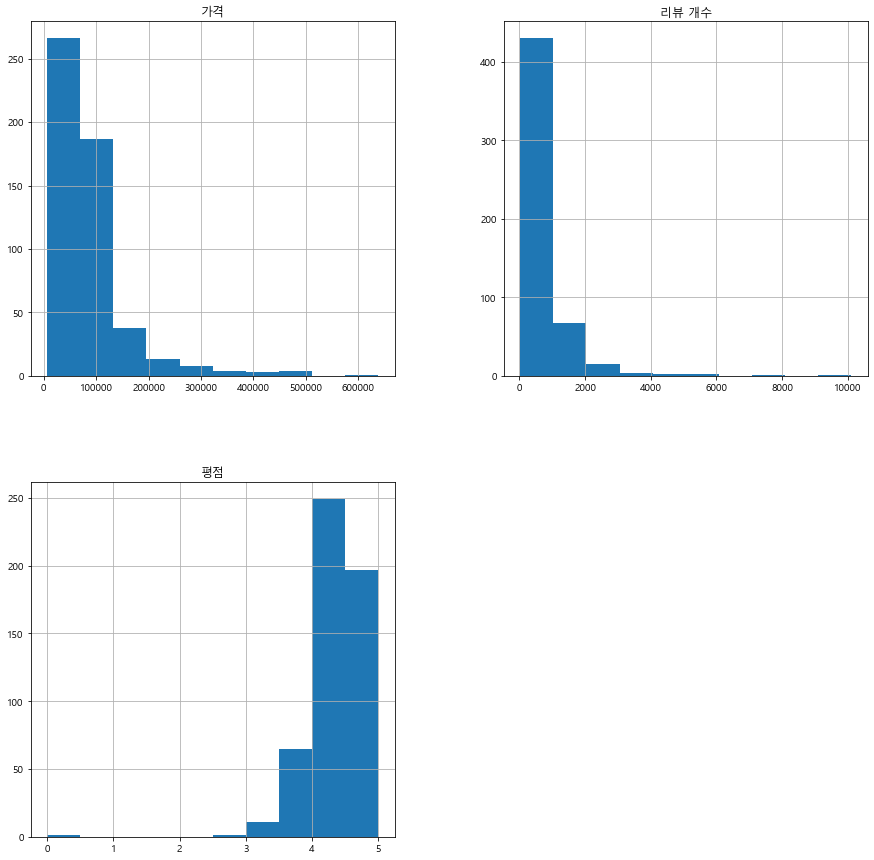

In [33]:
hotel_search.hist(figsize=(15,15))
plt.show()

In [13]:
#df=hotel_search.iloc[:,1:4]

In [14]:
#df

,평점,리뷰 개수,가격
0,4.68,37,24954
1,4.80,59,71250
2,4.84,70,49678
3,4.49,49,39280
4,4.34,180,25463
...,...,...,...
677,4.65,173,32000
678,3.75,275,55000
679,4.20,560,27200
680,3.80,277,18900


In [15]:
ht=hotel_search['사이트'].value_counts()
ht

부킹 닷컴     245
야놀자       100
호텔스닷컴      92
AirBnb     87
Name: 사이트, dtype: int64

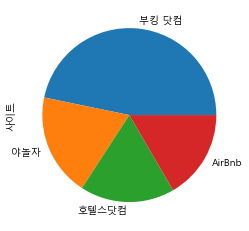

In [16]:
ht.plot.pie()

Text(0.5, 1.0, '서울 호텔 검색 결과')

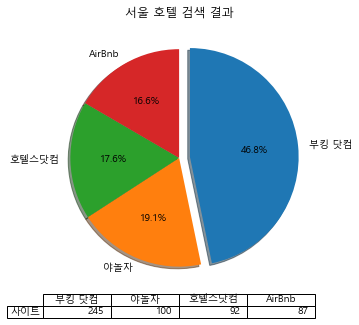

In [18]:
explode_value = (0.1, 0, 0, 0)
fruit_pie = ht.plot.pie(figsize=(5, 5), autopct='%.1f%%', startangle=90, 
    counterclock = False, explode=explode_value, shadow=True, table=True)
fruit_pie.set_ylabel("") # 불필요한 y축 라벨 제거
fruit_pie.set_title("서울 호텔 검색 결과")

## 사이트별 요소간의 상관관계 

In [19]:
yanolja=hotel_search[hotel_search['사이트']=='야놀자']['평점']
hotels=hotel_search[hotel_search['사이트']=='호텔스닷컴']['평점']
booking=hotel_search[hotel_search['사이트']=='부킹 닷컴']['평점']
airbnb=hotel_search[hotel_search['사이트']=='AirBnb']['평점']

yanolja_p=hotel_search[hotel_search['사이트']=='야놀자']['가격']
hotels_p=hotel_search[hotel_search['사이트']=='호텔스닷컴']['가격']
booking_p=hotel_search[hotel_search['사이트']=='부킹 닷컴']['가격']
airbnb_p=hotel_search[hotel_search['사이트']=='AirBnb']['가격']

yanolja_r=hotel_search[hotel_search['사이트']=='야놀자']['리뷰 개수']
hotels_r=hotel_search[hotel_search['사이트']=='호텔스닷컴']['리뷰 개수']
booking_r=hotel_search[hotel_search['사이트']=='부킹 닷컴']['리뷰 개수']
airbnb_r=hotel_search[hotel_search['사이트']=='AirBnb']['리뷰 개수']

reviews=hotel_search['리뷰 개수']
prices=hotel_search['가격']
comment=hotel_search['평점']

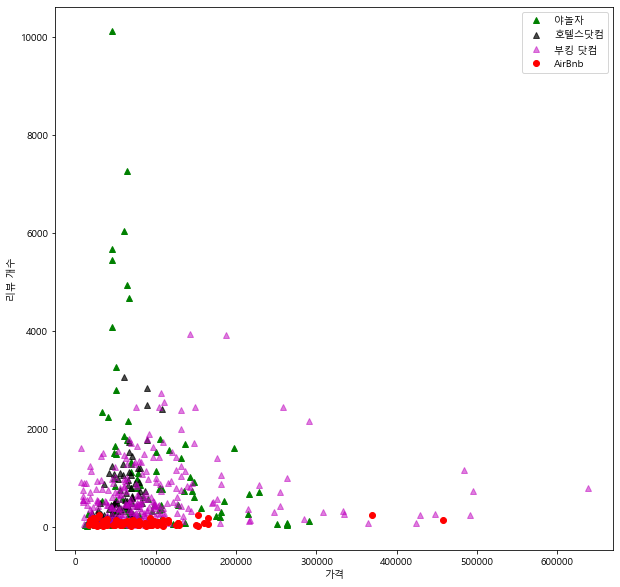

In [29]:
plt.figure(figsize=(10,10))
plt.plot(yanolja_p,yanolja_r,'^g',label='야놀자')
plt.xlabel('가격')
plt.ylabel('리뷰 개수')
plt.legend()

plt.plot(hotels_p,hotels_r,'^k',label='호텔스닷컴',alpha=0.7)
plt.xlabel('가격')
plt.ylabel('리뷰 개수')
plt.legend()

plt.plot(booking_p,booking_r,'^m',label='부킹 닷컴',alpha=0.5)
plt.xlabel('가격')
plt.ylabel('리뷰 개수')
plt.legend()
plt.plot(airbnb_p,airbnb_r,'or',label='AirBnb')
plt.xlabel('가격')
plt.ylabel('리뷰 개수')
plt.legend()
plt.show()

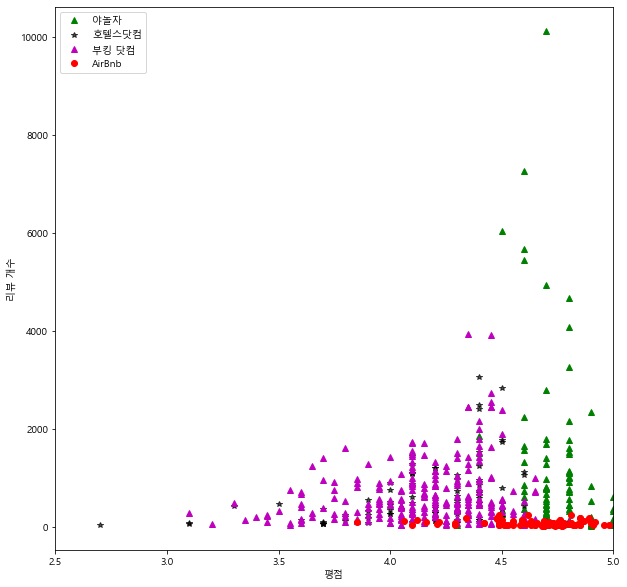

In [30]:
plt.figure(figsize=(10,10))
plt.xlim(2.5,5)
plt.plot(yanolja,yanolja_r,'^g',label='야놀자')
plt.legend()
plt.xlabel('평점')
plt.ylabel('리뷰 개수')


plt.plot(hotels,hotels_r,'*k',label='호텔스닷컴',alpha=0.7)
plt.legend()
plt.xlabel('평점')
plt.ylabel('리뷰 개수')


plt.plot(booking,booking_r,'^m',label='부킹 닷컴')
plt.legend()
plt.xlabel('평점')
plt.ylabel('리뷰 개수')


plt.plot(airbnb,airbnb_r,'or',label='AirBnb')
plt.legend()
plt.xlabel('평점')
plt.ylabel('리뷰 개수')

plt.show()

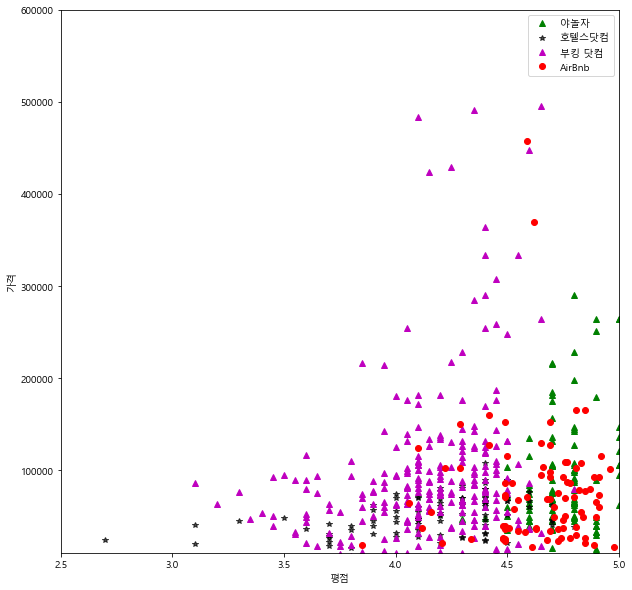

In [31]:
plt.figure(figsize=(10,10))
plt.xlim(2.5,5)
plt.ylim(10000,600000)
plt.plot(yanolja,yanolja_p,'^g',label='야놀자')
plt.legend()
plt.xlabel('평점')
plt.ylabel('가격')


plt.plot(hotels,hotels_p,'*k',label='호텔스닷컴',alpha=0.7)
plt.legend()
plt.xlabel('평점')
plt.ylabel('가격')


plt.plot(booking,booking_p,'^m',label='부킹 닷컴')
plt.legend()
plt.xlabel('평점')
plt.ylabel('가격')


plt.plot(airbnb,airbnb_p,'or',label='AirBnb')
plt.legend()
plt.xlabel('평점')
plt.ylabel('가격')

plt.show()

## 요소간의 상관관계

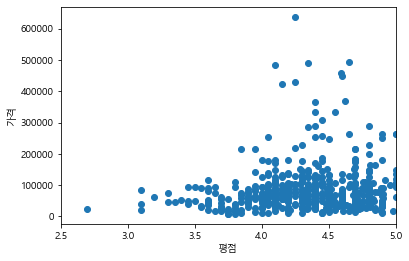

In [24]:
plt.xlim(2.5,5)
plt.scatter(hotel_search['평점'],hotel_search['가격'])
plt.xlabel('평점')
plt.ylabel('가격')
plt.show()

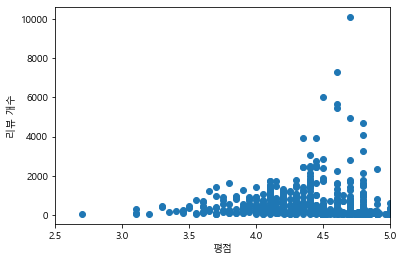

In [25]:
plt.xlim(2.5,5)
plt.scatter(hotel_search['평점'],hotel_search['리뷰 개수'])
plt.xlabel('평점')
plt.ylabel('리뷰 개수')
plt.show()

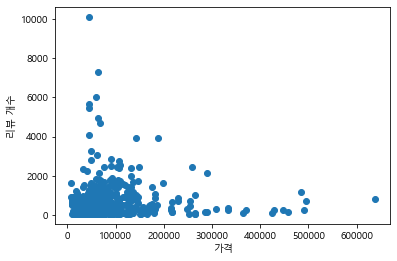

In [26]:
plt.scatter(hotel_search['가격'],hotel_search['리뷰 개수'])
plt.xlabel('가격')
plt.ylabel('리뷰 개수')
plt.show()

In [27]:
searching[1]

이름       김치 신촌 게스트하우스
평점                3.8
리뷰 개수            1608
가격               6545
사이트             부킹 닷컴
Name: 516, dtype: object

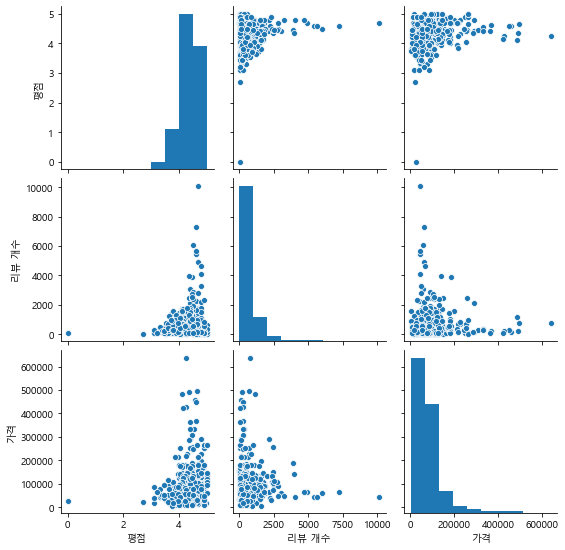

In [12]:
import seaborn as sns
sns.pairplot(hotel_search)

In [38]:
hotel_search.corr()['가격'].sort_values(ascending=False)

가격       1.000000
평점       0.141720
리뷰 개수    0.008655
Name: 가격, dtype: float64

In [39]:
hotel_search.corr()['평점'].sort_values(ascending=False)

평점       1.000000
가격       0.141720
리뷰 개수    0.077917
Name: 평점, dtype: float64

In [40]:
hotel_search.corr()['리뷰 개수'].sort_values(ascending=False)

리뷰 개수    1.000000
평점       0.077917
가격       0.008655
Name: 리뷰 개수, dtype: float64

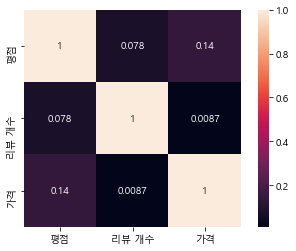

In [41]:
sns.heatmap(hotel_search.corr(), square=True, annot=True)